In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Reshape, add
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras import regularizers
from skimage.util import random_noise
import cv2
import keras
import os
import pickle
from keras.models import model_from_json
import json
from PIL import Image, ImageFilter
from keras import metrics

In [2]:
PATH=r'C:\Users\Pratham Agarwal\Desktop\Major Project\validationDataset\validationDataset\clean'
PATH2=r'C:\Users\Pratham Agarwal\Desktop\Major Project\validationDataset\validationDataset\smudged'
directory=os.listdir(PATH)
directory2=os.listdir(PATH2)
directory.sort()
directory2.sort()

In [3]:
X_train=[]
for file in directory:
    img=cv2.imread("{}/{}".format(PATH,file),0)
    try:
      X_train.append(img)
    except:
      pass

In [4]:
y_train=[]
for file in directory:
    img=cv2.imread("{}/{}".format(PATH2,file),0)
    try:
      y_train.append(img)
    except:
      pass

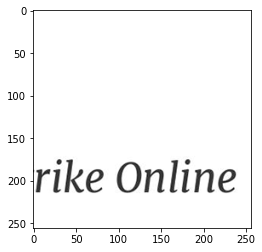

In [33]:
plt.imshow(X_train[76],cmap='gray')

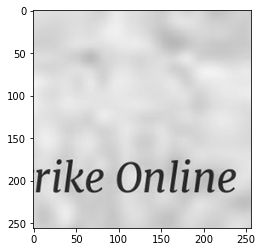

In [35]:
plt.imshow(y_train[76],cmap='gray')

In [7]:
def apply_filter1(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    image = Image.fromarray(image.astype('uint8'))
    new_image = image.filter(ImageFilter.UnsharpMask(radius=1, percent=150))
    new_image = np.array(new_image)
    return new_image

In [8]:
# for i in range(0, len(y_train)):
# #     y_train[i] = apply_filter1(y_train[i])
# #     X_train[i] = apply_filter1(X_train[i])
#     y_train[i] = cv2.cvtColor(y_train[i], cv2.COLOR_BGR2GRAY)
#     X_train[i] = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2GRAY)
# plt.imshow(y_train[0])

In [7]:
X_train=np.array(X_train)
y_train=np.array(y_train)
y_train.shape

(288, 256, 256)

In [8]:
X_train = X_train/255.0
y_train = y_train/255.0

In [9]:
shape=X_train.shape
X_train=X_train.reshape(shape[0],shape[1],shape[2],1)
y_train=y_train.reshape(shape[0],shape[1],shape[2],1)

In [10]:
PATH3=r'C:\Users\Pratham Agarwal\Desktop\Major Project\V3'
model = 'smudge_autoencoderV5.json'
weight = 'smudge_autoencoder_weightsV5.h5'

In [28]:
json_file = open(r'{}\{}'.format(PATH3, model), 'r')
json_model = model_from_json(json_file.read())
json_model.load_weights(r'{}\{}'.format(PATH3, weight))

In [36]:
json_model.compile(optimizer='adamax', loss='mse', metrics=['accuracy', 'mse', 'mae', 'Precision'])

In [37]:
result = json_model.evaluate(y_train, X_train, batch_size=1)

288/288 [==============================] - 19s 64ms/step - loss: 4.9389e-04 - accuracy: 0.8348 - mse: 4.9389e-04 - mae: 0.0063 - precision: 1.0000


In [19]:
test_image = json_model.predict(y_train[56].reshape(1,256,256,1)).reshape(256, 256)

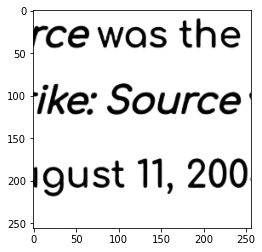

In [21]:
# cv2.imwrite(r'B:\Major\datast\filter_test\vt1.png'.format(PATH), test_image*255)
plt.imshow(test_image,cmap='gray')